# Analysis of Premier League Statistics

## Your research question:
Do certain countries tend to produce players that are good at specific positions, and in which positions can a clear cut conclusion be made.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("dataset - 2020-09-24.csv")

## Part 1: Get a sense of the data
Before you start doing anything with you data, you need to get a sense of what the data contains. Considering using .info(), .describe(), .columns, or other tools to get a sense of the data. You can reference ChatGPT if you are looking for other options.

In [4]:
data.columns

Index(['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow 

In [5]:
data.describe

<bound method NDFrame.describe of                      Name  Jersey Number                     Club    Position  \
0              Bernd Leno            1.0                  Arsenal  Goalkeeper   
1              Matt Macey           33.0                  Arsenal  Goalkeeper   
2    Rúnar Alex Rúnarsson           13.0                  Arsenal  Goalkeeper   
3         Héctor Bellerín            2.0                  Arsenal    Defender   
4          Kieran Tierney            3.0                  Arsenal    Defender   
..                    ...            ...                      ...         ...   
566            Pedro Neto            7.0  Wolverhampton-Wanderers     Forward   
567          Raúl Jiménez            9.0  Wolverhampton-Wanderers     Forward   
568          Adama Traoré           37.0  Wolverhampton-Wanderers     Forward   
569           Fábio Silva           17.0  Wolverhampton-Wanderers     Forward   
570      Leonardo Campana           30.0  Wolverhampton-Wanderers     Forwa

In [6]:
data.info

<bound method DataFrame.info of                      Name  Jersey Number                     Club    Position  \
0              Bernd Leno            1.0                  Arsenal  Goalkeeper   
1              Matt Macey           33.0                  Arsenal  Goalkeeper   
2    Rúnar Alex Rúnarsson           13.0                  Arsenal  Goalkeeper   
3         Héctor Bellerín            2.0                  Arsenal    Defender   
4          Kieran Tierney            3.0                  Arsenal    Defender   
..                    ...            ...                      ...         ...   
566            Pedro Neto            7.0  Wolverhampton-Wanderers     Forward   
567          Raúl Jiménez            9.0  Wolverhampton-Wanderers     Forward   
568          Adama Traoré           37.0  Wolverhampton-Wanderers     Forward   
569           Fábio Silva           17.0  Wolverhampton-Wanderers     Forward   
570      Leonardo Campana           30.0  Wolverhampton-Wanderers     Forward

In [7]:
data.head

<bound method NDFrame.head of                      Name  Jersey Number                     Club    Position  \
0              Bernd Leno            1.0                  Arsenal  Goalkeeper   
1              Matt Macey           33.0                  Arsenal  Goalkeeper   
2    Rúnar Alex Rúnarsson           13.0                  Arsenal  Goalkeeper   
3         Héctor Bellerín            2.0                  Arsenal    Defender   
4          Kieran Tierney            3.0                  Arsenal    Defender   
..                    ...            ...                      ...         ...   
566            Pedro Neto            7.0  Wolverhampton-Wanderers     Forward   
567          Raúl Jiménez            9.0  Wolverhampton-Wanderers     Forward   
568          Adama Traoré           37.0  Wolverhampton-Wanderers     Forward   
569           Fábio Silva           17.0  Wolverhampton-Wanderers     Forward   
570      Leonardo Campana           30.0  Wolverhampton-Wanderers     Forward  

### Write your response in this space.
From my code, I learned the types of columns in my dataframe, and the type of info that they include. I looked through different players it included, and noticed that the data is not current as it says come players are younger than they are currently. I noticed yellow and red cards, which could be interesting for a project that analyzed the success of defenders based on fouls and cards. I also saw that it had columns about every position (goalie, defender, midfield, offender). This would be interesting if I wanted to do a project about how different data about players effects the team. I think the most interesting thing is the nationality that it gives, because I could see which countries have the most players that are the best in certain positions.

## Part 2: Data Cleaning
Look for missing data. If you decide to drop rows or columns, explain your choice.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("dataset - 2020-09-24.csv")

data['Shooting accuracy %'] = data['Shooting accuracy %'].str.replace('%', '').astype(float)
data['Cross accuracy %'] = data['Cross accuracy %'].str.replace('%', '').astype(float)


data.columns

Index(['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow 

Did you drop columns or rows? If so, explain why. If not, explain why not.


### Write your response in this space.
I decided to make the data for percentage shots and percentage crosses integers with no percent signs. This is so that I can display the data as an integer in graphs and modifiy it with / or * in code. I decided not to drop any other columns or rows. This is because almost every columns applies at least to one position of player. For positions that the column does not apply to, there is already an NaN there so it will not effect my data.

## Part 3: Data manipulation
Use groupby to analyze data and get a better understanding of potential trends. For example, if you want to look at scoring likelihood, you might group teams by whether they were home or away or you could group them by team. You should be using groupby on categorical data, not on numerical data (ask me why if you aren't sure).

In [9]:
# group_test = data.groupby("Position")
# group_test.get_group("Defender")

groups = data.groupby("Nationality")["Fouls"].mean()
groups

Nationality
Algeria                              53.333333
Argentina                            62.923077
Australia                             1.000000
Austria                              79.000000
Belgium                              60.461538
Bosnia And Herzegovina               58.000000
Brazil                               64.625000
Burkina Faso                          3.000000
Cameroon                             39.000000
Colombia                             30.800000
Cote D'Ivoire                        65.571429
Croatia                              13.333333
Czech Republic                        9.000000
Denmark                              32.000000
Ecuador                               0.000000
Egypt                                60.400000
England                              53.171946
France                               68.666667
Gabon                                45.000000
Germany                              35.250000
Ghana                                81.200000
G

In [10]:
forwards = data[data['Position'] == 'Forward']

grouped = forwards.groupby('Nationality').agg({
    'Goals': 'mean', 
    'Assists': 'mean',
    'Shooting accuracy %': 'mean',
    'Appearances': 'mean'
})

sorted_attackers = grouped.sort_values(by='Appearances', ascending=False)

sorted_attackers

,Goals,Assists,Shooting accuracy %,Appearances
Nationality,,,,
Argentina,180.000000,46.000000,41.000000,263.000000
Senegal,86.000000,29.000000,43.000000,196.000000
South Korea,57.000000,29.000000,43.000000,162.000000
Ghana,25.000000,9.000000,35.000000,139.000000
Cote D'Ivoire,22.000000,15.000000,35.000000,125.000000
Egypt,78.000000,29.000000,45.000000,123.000000
Algeria,32.500000,22.500000,41.500000,119.000000
The Democratic Republic Of Congo,11.000000,17.000000,33.000000,119.000000
New Zealand,36.000000,4.000000,47.000000,105.000000


In [11]:
defenders = data[data['Position'] == 'Defender']

grouped_defenders = defenders.groupby('Nationality').agg({
    'Tackles': 'mean',
    'Interceptions': 'mean',
    'Clearances': 'mean',
    'Duels won': 'mean',
    'Appearances': 'mean'
})

sorted_defenders = grouped_defenders.sort_values(by='Tackles', ascending=False)

sorted_defenders


,Tackles,Interceptions,Clearances,Duels won,Appearances
Nationality,,,,,
Serbia,528.000000,393.000000,1137.000000,1427.000000,261.000000
Austria,255.000000,248.000000,365.000000,513.000000,107.000000
Northern Ireland,255.000000,306.000000,950.000000,769.500000,163.500000
Spain,224.428571,161.285714,256.428571,508.857143,106.428571
The Democratic Republic Of Congo,196.000000,102.000000,140.000000,506.000000,81.000000
Wales,175.800000,138.000000,318.600000,412.600000,96.400000
Argentina,175.250000,183.000000,538.000000,497.500000,99.500000
Scotland,170.333333,105.333333,236.333333,331.000000,78.666667
Egypt,162.500000,153.000000,306.000000,576.000000,110.500000


In [12]:
midfielders = data[data['Position'] == 'Midfielder']

In [13]:
midfielders["Cross accuracy %"].dtype
# midfielders.loc[:,"Cross accuracy %"] = midfielders.loc[:,"Cross accuracy %"].dropna()

dtype('float64')

In [14]:


grouped_midfielders = midfielders.groupby('Nationality').agg({
    'Assists': 'mean',
    'Passes per match': 'mean',
    'Big chances created': 'mean',
    'Cross accuracy %': 'mean',
    'Appearances': 'mean'
    
})

sorted_midfielders = grouped_midfielders.sort_values(by='Assists', ascending=False)

sorted_midfielders


,Assists,Passes per match,Big chances created,Cross accuracy %,Appearances
Nationality,,,,,
Iceland,31.000000,22.765000,40.000000,29.000000,190.000000
Belgium,16.000000,31.584000,23.400000,17.200000,59.200000
Switzerland,15.500000,50.105000,22.000000,25.500000,123.500000
Germany,12.833333,31.506667,18.666667,18.500000,71.166667
France,10.571429,45.512857,12.857143,25.285714,109.714286
Scotland,9.538462,28.295385,12.692308,19.538462,83.615385
Argentina,9.500000,28.225000,11.750000,21.500000,78.750000
Spain,8.444444,40.968889,11.333333,14.888889,68.222222
England,8.287671,23.306849,10.452055,17.300000,86.328767


In [15]:
goalkeepers = data[data['Position'] == 'Goalkeeper']

grouped_goalkeepers = goalkeepers.groupby('Nationality').agg({
    'Saves': 'mean',
    'Clean sheets': 'mean',
    'Penalties saved': 'mean',
    'High Claims': 'mean',
    'Appearances': 'mean'
})

sorted_goalkeepers = grouped_goalkeepers.sort_values(by='Saves', ascending=False)

sorted_goalkeepers


,Saves,Clean sheets,Penalties saved,High Claims,Appearances
Nationality,,,,,
Poland,403.500000,31.500000,3.000000,178.500000,123.000000
Denmark,395.000000,39.500000,4.000000,103.500000,140.000000
France,353.000000,46.000000,2.500000,105.000000,131.500000
Australia,340.000000,26.000000,2.000000,68.000000,112.000000
Wales,313.000000,18.500000,1.500000,138.000000,91.500000
Spain,237.714286,27.142857,1.142857,56.857143,82.857143
Brazil,160.500000,43.500000,1.500000,32.500000,89.500000
Germany,136.500000,13.500000,1.000000,20.000000,46.500000
Slovakia,131.500000,13.000000,0.500000,37.500000,44.500000


To find which countries generally have better players, I grouped the players by nationality, then found the average for that nationality of columns that apply to each player position. I also included a column for the average appearences, so that the data was taken in considering that some players play more than others. Right now it is hard to look at the info and see which nations are better, but I can tell that Gabon has particularly good statistics for strikers, Egpyt and Belgium have good statisics for midfielders, Italy has good statistics for defenders, and Poland and Denmark ha good statisicts for goalies.

# Part 4: Data Visualization

## Initial Investigation

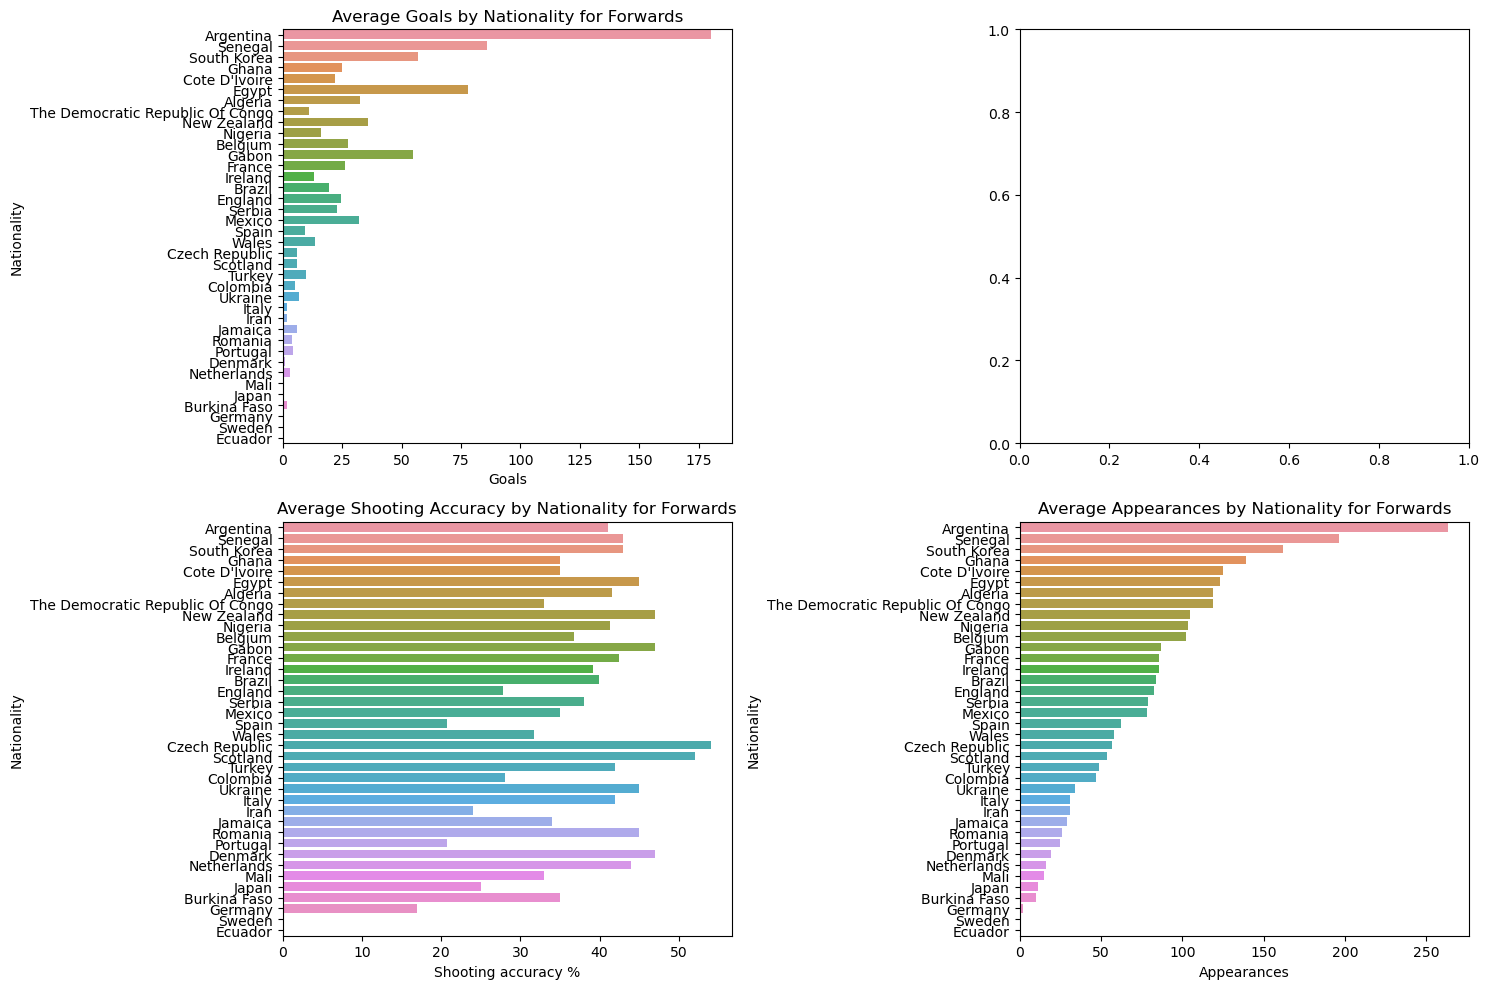

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.barplot(ax=axes[0, 0], x='Goals', y=sorted_attackers.index, data=sorted_attackers)
axes[0, 0].set_title('Average Goals by Nationality for Forwards')

sns.barplot(ax=axes[1, 0], x='Shooting accuracy %', y=sorted_attackers.index, data=sorted_attackers)
axes[1, 0].set_title('Average Shooting Accuracy by Nationality for Forwards')

sns.barplot(ax=axes[1, 1], x='Appearances', y=sorted_attackers.index, data=sorted_attackers)
axes[1, 1].set_title('Average Appearances by Nationality for Forwards')

plt.tight_layout()
plt.show()


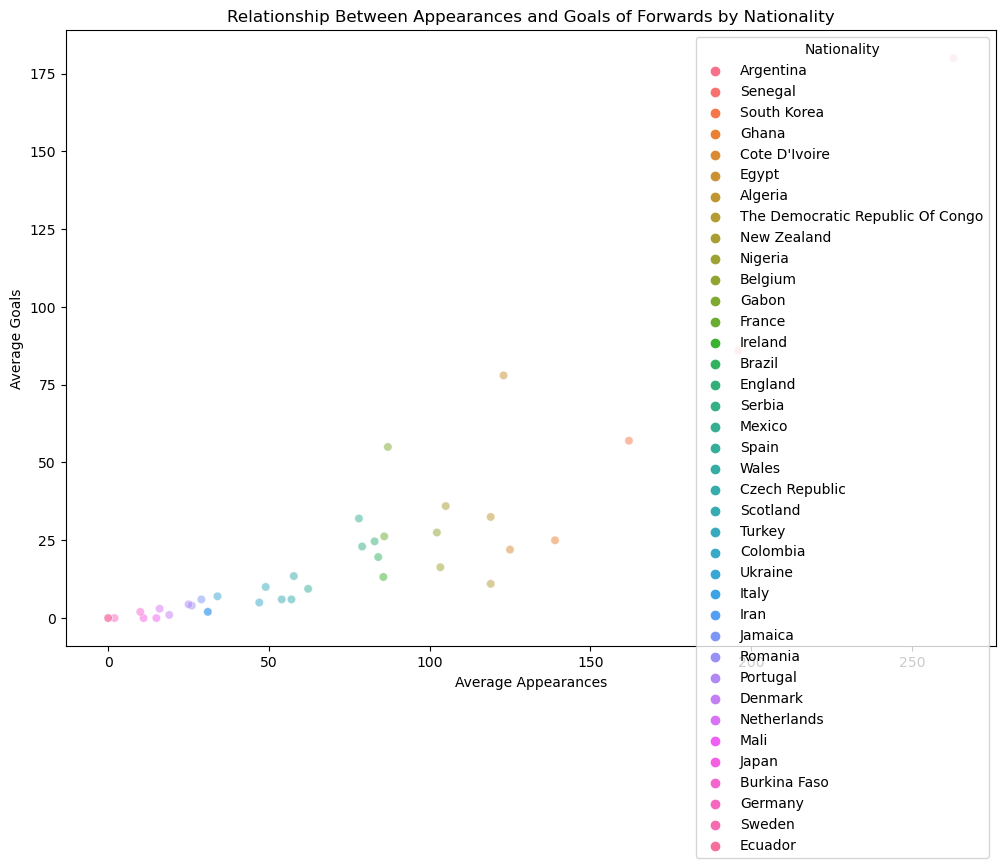

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Appearances', y='Goals', hue='Nationality', data = sorted_attackers, alpha=0.5)

plt.xlabel('Average Appearances')
plt.ylabel('Average Goals')
plt.title('Relationship Between Appearances and Goals of Forwards by Nationality')

plt.show()


## Using HeatMaps to look for correlations in each position. Each of these heatmaps is the average for each column. For example, the appearance column is the average number of appearances for players in that specific country. Some columns do not have to do with appearences, and are metioned in the individual explanations.

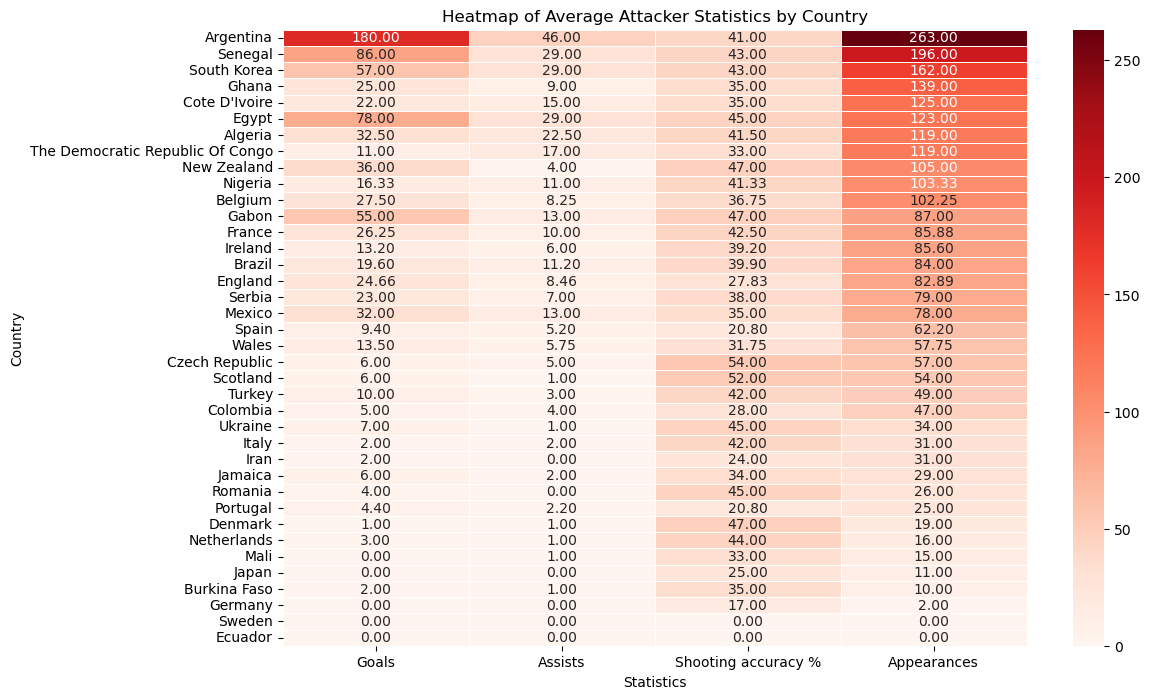

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

sns.heatmap(sorted_attackers, annot=True, fmt=".2f", linewidths=.5, cmap='Reds')

plt.title('Heatmap of Average Attacker Statistics by Country')
plt.xlabel('Statistics')
plt.ylabel('Country')

plt.show()




The country that clearly wins the Goals column is Gabon, with a ratio to appearences of .63. Furthermore they have an excellent shooting accurcy statistic (not compared to Appearences) of 47%, only being beaten by the Czech Republic and Scotland. They furthermore have a decently high amount of assists compared to their appearences, with a ratio of .15, but this ratio is still beaten by Mexico. What I conclude from this is that Stikers from Gabon not only tend to score more goals in the Premier League than stikers from any other country, but this has a direct correlation to that fact that they have such a high shooting accuracy, which almost no other country is able to match. They do lose to Mexico in the assists column, but still fall in the top three with that statistic.

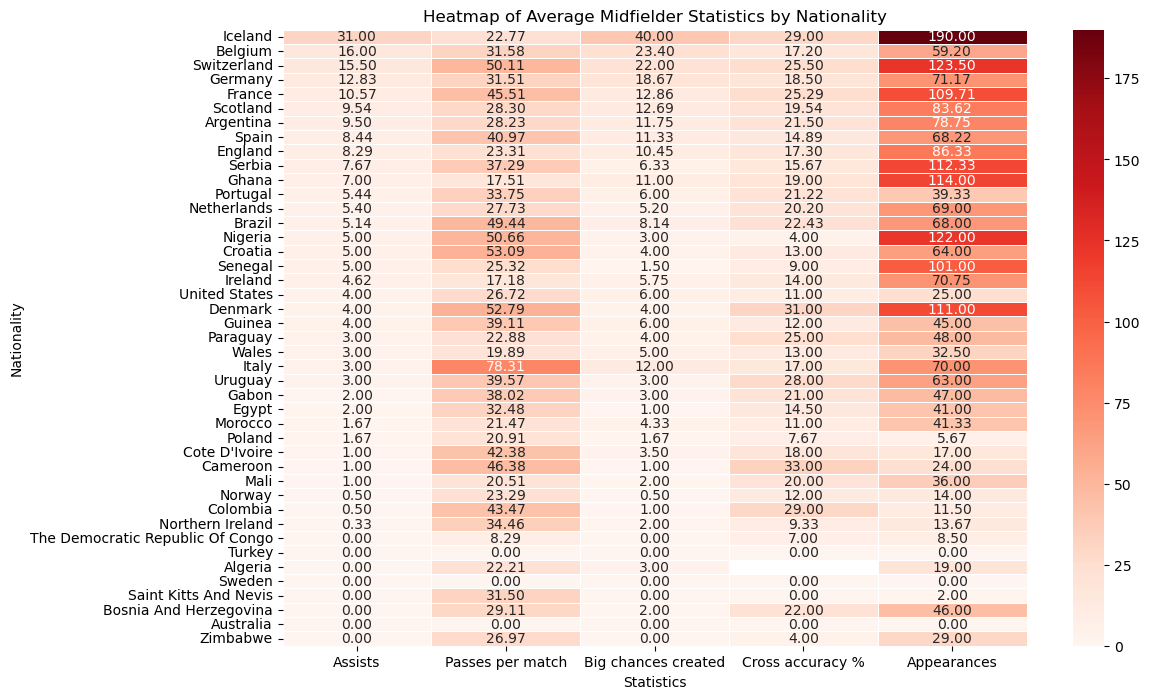

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

sns.heatmap(sorted_midfielders, annot=True, fmt=".2f", linewidths=.5, cmap='Reds')

plt.title('Heatmap of Average Midfielder Statistics by Nationality')
plt.xlabel('Statistics')
plt.ylabel('Nationality')

plt.show()


Looking at the assists column, Belgium stands out with the best ratio to appearences of .27. They also stand out in Big Chances created column with a ratio to appearences .39. However, the clear best country in the passes per match catagory is Italy, with an overwhelming 78. As this column has nothing to do with appearences, it is simply the country with the greatest number. The cross accuracy percent also does not have to do with appearences, and the winniner of this column is Cameroon with 33%. Despite some countries being better than Belgium in certain areas, these other countries lack the consistensy Belgium has in the other columns, and I would place Belgium at the top for producing good midfielders. 

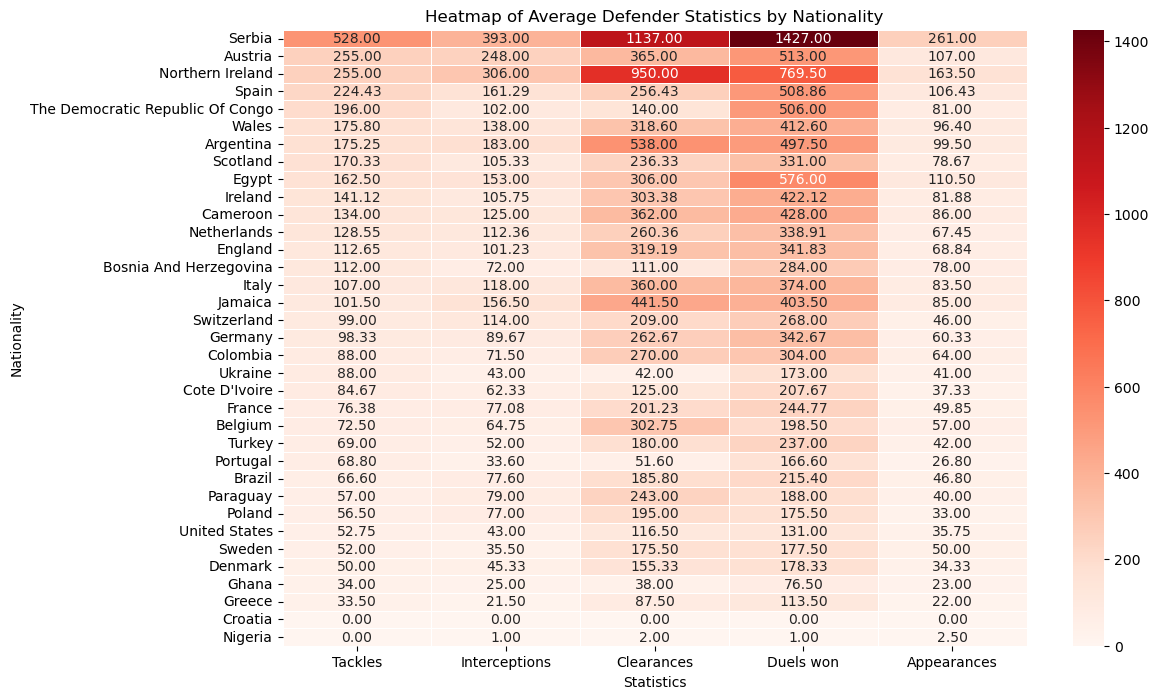

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

sns.heatmap(sorted_defenders, annot=True, fmt=".2f", linewidths=.5, cmap='Reds')

plt.title('Heatmap of Average Defender Statistics by Nationality')
plt.xlabel('Statistics')
plt.ylabel('Nationality')

plt.show()


We can see that there is no clear winner for a country when it comes to defenders. While certain countries do have the best statistics for individual catagories, it is the same proportion to the average number of appearences that they have. While Serbia looks very good for Duels won with a 5.47 ratio to appearences, countries like Egypt and Greece who look less impress have similar ratios to appearences of 5.24 and 5.14. The same goes for clearance statisic for Northern Ireland, while looking good at a ratio of 5.8, has a similar ratio to appearences that countries like Argentina and Jamaica have with 5.43 and 5.18. This same pattern tracks to the first two columns as well. What can be concluded from this is that while there are certainly a group of countries that produce better defenders, there is no clear winner. These countries include Serbia, Argentina, and Northern Ireland. While some other countries beat these in certain areas, overall these countries have the best statistics.

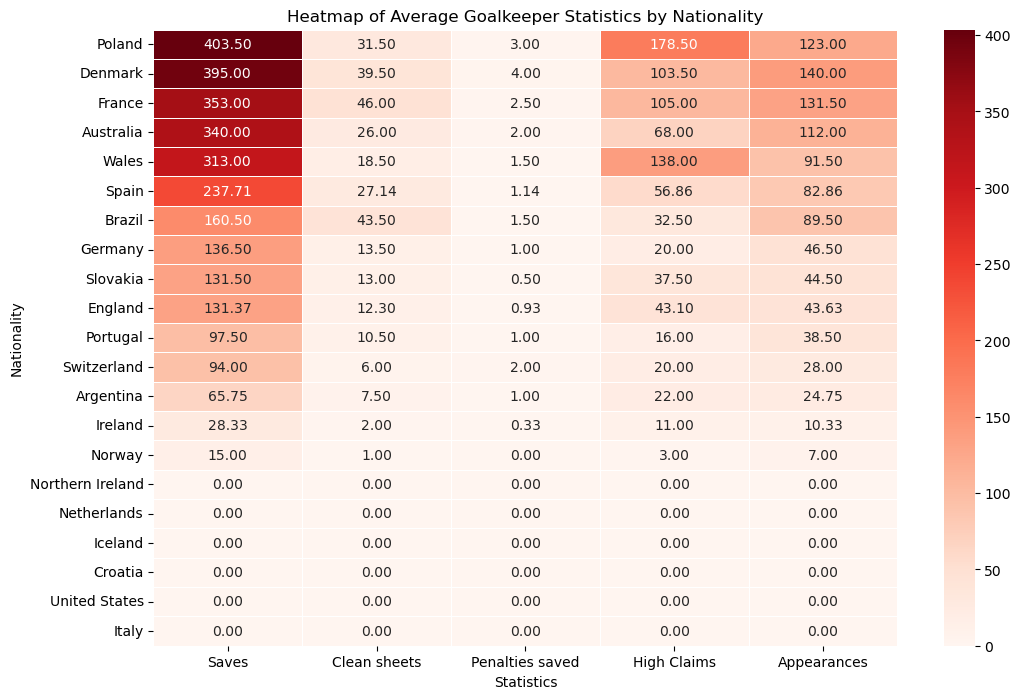

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

sns.heatmap(sorted_goalkeepers, annot=True, fmt=".2f", linewidths=.5, cmap='Reds')

plt.title('Heatmap of Average Goalkeeper Statistics by Nationality')
plt.xlabel('Statistics')
plt.ylabel('Nationality')

plt.show()


This data tells me that Poland produces by far the best goalkeepers. We can see that they have on average 4 times the saves than appearences, 1.5 times the high claims than appearences, and on average the most amount of penalites saved. However, some other countries do beat Poland in certain areas. For example, Brazil has more clean sheets for less appearences compared to Poland. Denmark also has a slightly better ratio of average penalties saved to average appearences than Poland does. Although other countries do have better clean sheet and penalty records, Polands good records there as well as best records in the other two columns put them at the top. 

## Conclusion
What I can conclude from all my research is that it is much harder to find a country that produces the best Defenders than in any other position. For strikers Gabon has the best statistics, for midfielders it is Belgium, for Goalkeepers in is Poland, but for defenders I got numerous countries at the top including Serbia, Argentina, and Northern Ireland. The most likely reason for this is that there are two main types of defenders wich are centerbacks and fullbacks. These different positions have different responsiblities, and it is possible certain countries only produce players that are good in one of those. Positions like goalie and stiker have much more clear measurements of success. I would expect the same thing to happen with midfielders as defenders, as there are many types of midfielders as well. This may mean that the conclusion I found for midfielders is incorrect, and if given more time and another dataset I would look more closely at specific positions, rather than general positions.